In [94]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [95]:
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 300)
pd.set_option("display.precision", 5)
pd.set_option("display.max_seq_items", 50)
pd.set_option("display.max_seq_items", 50)

In [96]:
file_name = "/home/t.afanasyeva/MAT_rnaseq/gene_counts/240224_all_datasets_combined.txt"
data = pd.read_csv(file_name, sep="\t", header=1, index_col="Geneid")
data.shape

(47698, 306)

In [97]:
data.head()

,umitools/104198-001-002.deduped.bam,umitools/104198-001-003.deduped.bam,umitools/104198-001-004.deduped.bam,umitools/104198-001-005.deduped.bam,umitools/104198-001-006.deduped.bam,umitools/104198-001-007.deduped.bam,umitools/104198-001-008.deduped.bam,umitools/104198-001-009.deduped.bam,umitools/104198-001-010.deduped.bam,umitools/104198-001-012.deduped.bam,...,umitools/105917-001-032.deduped.bam,umitools/105917-001-033.deduped.bam,umitools/105917-001-034.deduped.bam,umitools/105917-001-035.deduped.bam,umitools/105917-001-036.deduped.bam,umitools/105917-001-037.deduped.bam,umitools/105917-001-038.deduped.bam,umitools/105917-001-039.deduped.bam,umitools/105917-001-040.deduped.bam,umitools/105917-001-041.deduped.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
DDX11L1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH7P,109,178,25,19,120,67,86,20,44,11,...,59,36,36,50,65,76,29,59,29,28
MIR6859-1,6,12,0,1,3,3,4,0,1,0,...,1,1,1,0,3,0,0,1,0,0
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
columns = list(data.columns)
new_columns = []
for column in columns:
    new_column = column.split("/")[1].split(".")[0]
    new_columns.append(new_column)
data.columns = new_columns

In [99]:
data.head()

,104198-001-002,104198-001-003,104198-001-004,104198-001-005,104198-001-006,104198-001-007,104198-001-008,104198-001-009,104198-001-010,104198-001-012,...,105917-001-032,105917-001-033,105917-001-034,105917-001-035,105917-001-036,105917-001-037,105917-001-038,105917-001-039,105917-001-040,105917-001-041
Geneid,,,,,,,,,,,,,,,,,,,,,
DDX11L1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH7P,109,178,25,19,120,67,86,20,44,11,...,59,36,36,50,65,76,29,59,29,28
MIR6859-1,6,12,0,1,3,3,4,0,1,0,...,1,1,1,0,3,0,0,1,0,0
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
path = "/home/t.afanasyeva/MAT_rnaseq/notebooks/resources/240319_sample_names.csv"
names = pd.read_csv(path, sep=";")

In [101]:
names.shape

(339, 3)

In [102]:
mapping_dict = dict(zip(names["sample_id"], names["sample_name"]))
mapping_dict

{'104741-001-001': 'BA029_7128_LTA_18',
 '104741-001-002': 'BA029_7128_LTA_19',
 '104741-001-003': 'BA029_7128_LTA_20',
 '104741-001-004': 'BA042_7128_IMDM_1',
 '104741-001-005': 'BA042_7128_IMDM_2',
 '104741-001-006': 'BA042_7128_IMDM_3',
 '104741-001-007': 'BA042_7128_LPS_5',
 '104741-001-008': 'BA042_7128_LPS_6',
 '104741-001-009': 'BA042_7128_LPS_8',
 '104741-001-010': 'BA042_7128_SCG_9',
 '104741-001-011': 'BA042_7128_SCG_10',
 '104741-001-012': 'BA042_7128_SCG_12',
 '104741-001-013': 'BA042_7128_CL8_13',
 '104741-001-014': 'BA042_7128_CL8_14',
 '104741-001-015': 'BA042_7128_CL8_15',
 '104741-001-016': 'BA042_7128_Fla-PA_17',
 '104741-001-017': 'BA042_7128_Fla-PA_18',
 '104741-001-018': 'BA042_7128_Fla-PA_20',
 '104741-001-019': 'BA042_7128_Alb_21',
 '104741-001-020': 'BA042_7128_Alb_23',
 '104741-001-021': 'BA042_7128_Alb_24',
 '104741-001-022': 'BA042_7128_Alb_22',
 '104741-001-023': 'BA029_7128_LTA_17',
 '105659-001-001': 'MD211_7100_IMDM_1',
 '105659-001-002': 'MD211_7100_IMDM

In [120]:
data = data.rename(columns=mapping_dict)
data = data.T
data = data[~data.index.duplicated(keep="last")]
data = data[data.index.notnull()]

In [119]:
data.shape

(47698, 274)

In [105]:
reads_counts = data.sum(axis=1)
mask = reads_counts > 1000000
data = data[mask]

In [106]:
data.shape

(276, 47698)

In [113]:
data.index.rename("samples", inplace=True)
data.reset_index(inplace=True)
data.index = data["samples"]
data.drop(columns="samples", inplace=True)

Here are the samples that are droped in based on the analysis

In [116]:
data = data.loc[data.index != "MD215_7115_IMDM_3"]  # Drop for low concentration
data = data.loc[data.index != "BA029_7128_IMDM_03"]
data = data.loc[data.index != "BA028_7128_IMDM_03"]

In [117]:
data.shape

(274, 47698)

Data analysis starts here

In [122]:
data.to_csv(
    "/home/t.afanasyeva/MAT_rnaseq/gene_counts/240224_complete_dataset_274_samples.csv",
    index="None",
)
# data = pd.read_csv("/home/t.afanasyeva/MAT_rnaseq/gene_counts/20240224_complete_dataset_273_samples.csv", index_col='samples')

In [51]:
df_analyisis = data.copy()

In [52]:
def to_normalize_rpm(data):
    # Normalise the gene counts to the library size
    data = data.apply(
        lambda x: (x / (np.sum(x) if np.sum(x) != 0 else 1)) * 1000000, axis=1
    )  # Apply by column, samples should be in coulumns
    return data


df_analyisis_norm = to_normalize_rpm(df_analyisis)
df_analyisis_norm

Geneid,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4F5,LOC124903816,LOC124900384,LOC729737,...,ND4,TRNH,TRNS2,TRNL2,ND5,ND6,TRNE,CYTB,TRNT,TRNP
samples,,,,,,,,,,,,,,,,,,,,,
MD104_7128_Pam3_5,0.0,24.00743,1.41220,0.0,0.0,0.0,0.0,0.00000,1.41220,40.95386,...,4503.51215,0.00000,0.00000,0.00000,3383.63597,1129.76159,2.82440,2671.88617,0.0000,35.30505
MD104_7128_SCG_1,0.0,12.65402,1.26540,0.0,0.0,0.0,0.0,0.00000,0.00000,55.67767,...,4189.74443,0.00000,0.00000,0.00000,3250.81650,1151.51538,1.26540,2688.97823,0.0000,51.88146
MD104_7128_SCG_2,0.0,11.70054,0.00000,0.0,0.0,0.0,0.0,0.00000,1.95009,35.10161,...,4587.58534,0.00000,0.00000,0.97504,3407.78125,1026.72208,6.82531,2900.75800,0.0000,49.72728
MD104_7128_SCG_3,0.0,22.61986,1.19052,0.0,0.0,0.0,0.0,0.00000,2.38104,59.52594,...,4926.36642,1.19052,1.19052,1.19052,3402.50247,1211.94805,1.19052,2932.24758,0.0000,63.09749
MD104_7128_SCG-low_1,0.0,16.15465,0.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,57.16260,...,4461.16796,1.24267,0.00000,2.48533,3585.08901,1191.71590,3.72800,2660.54613,0.0000,68.34658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MD251_7128_CL307_20,0.0,23.31570,0.00000,0.0,0.0,0.0,0.0,0.30679,0.92036,18.71392,...,3631.42048,0.30679,0.30679,0.92036,2479.74755,666.95177,1.84071,2202.72021,0.0000,39.88212
MD251_7128_CL307_21,0.0,13.14271,0.00000,0.0,0.0,0.0,0.0,0.00000,2.71918,10.87673,...,3565.75390,0.00000,0.00000,1.35959,2555.57781,687.95303,0.45320,2159.03045,0.4532,43.50691
MD251_7128_CRX-527_22,0.0,24.01859,0.40709,0.0,0.0,0.0,0.0,0.00000,1.22128,13.84122,...,3831.98225,0.00000,0.00000,0.81419,2638.38064,705.08799,4.07095,2383.13228,0.0000,42.74494


In [76]:
il6_data = df_analyisis_norm["IL6"]

In [77]:
il6_data

samples
MD104_7128_SCG_1           43.02365
MD104_7128_SCG_2         1428.44049
MD104_7128_SCG_3         1472.67164
MD104_7128_SCG_L_1         48.46394
MD104_7128_SCG_L_2         32.21131
                            ...    
MD251_7128_CL307_20       943.36555
MD251_7128_CL307_21       950.80728
MD251_7128_CRX-527_22    1375.16584
MD251_7128_CRX-527_23    1279.43283
MD251_7128_CRX-527_24    1444.32786
Name: IL6, Length: 274, dtype: float64

In [78]:
il6_data = il6_data.to_frame()

In [79]:
break here

SyntaxError: invalid syntax (760050616.py, line 1)

/tmp/ipykernel_913415/4241461274.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha="left", rotation_mode="anchor")


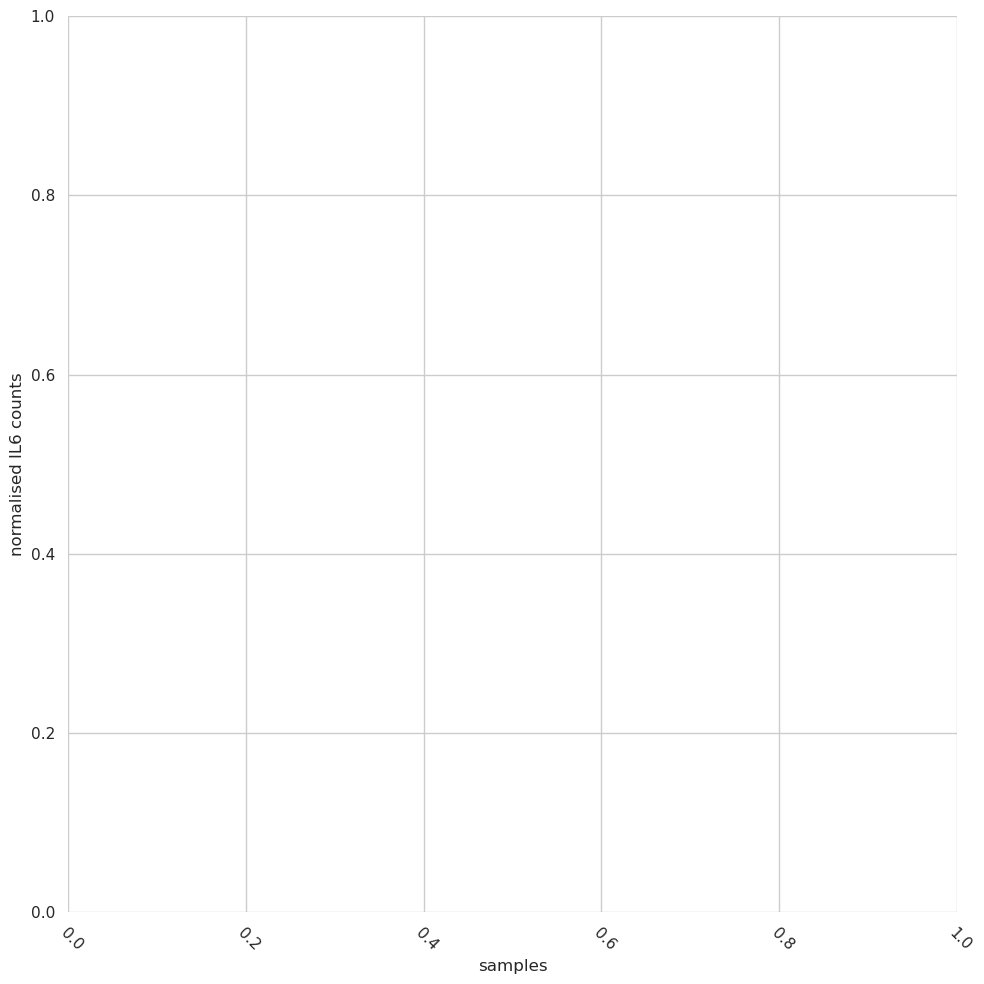

In [ ]:
sns.set_theme(style="whitegrid")


fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x=il6_data.index, y="IL6", data=il6_data)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=-45, ha="left", rotation_mode="anchor"
)

ax.set(ylabel="normalised IL6 counts", xlabel="samples")

sns.despine(left=True, bottom=True)

plt.tight_layout()

fig.savefig("IL6_IMDM.png")
plt.show()

In [ ]:
il6_data

NameError: name 'il6_data' is not defined

In [ ]:
data.loc["BA028_7128_IMDM_03"]["IL6"]

4

In [ ]:
il6_data

Droping  BA029_7128_IMDM_03 and BA028_7128_IMDM_03   

In [ ]:
data.shape

(276, 47698)

In [ ]:
il6_lps = il6[["_LPS_" in s for s in il6.index]].sort_values()


il6_lps = il6_lps.to_frame()

droping  MD211_7100_LPS_1, MD211_7100_LPS_2, MD211_7100_LPS_3  for training

/tmp/ipykernel_72322/1088326970.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha="left", rotation_mode="anchor")


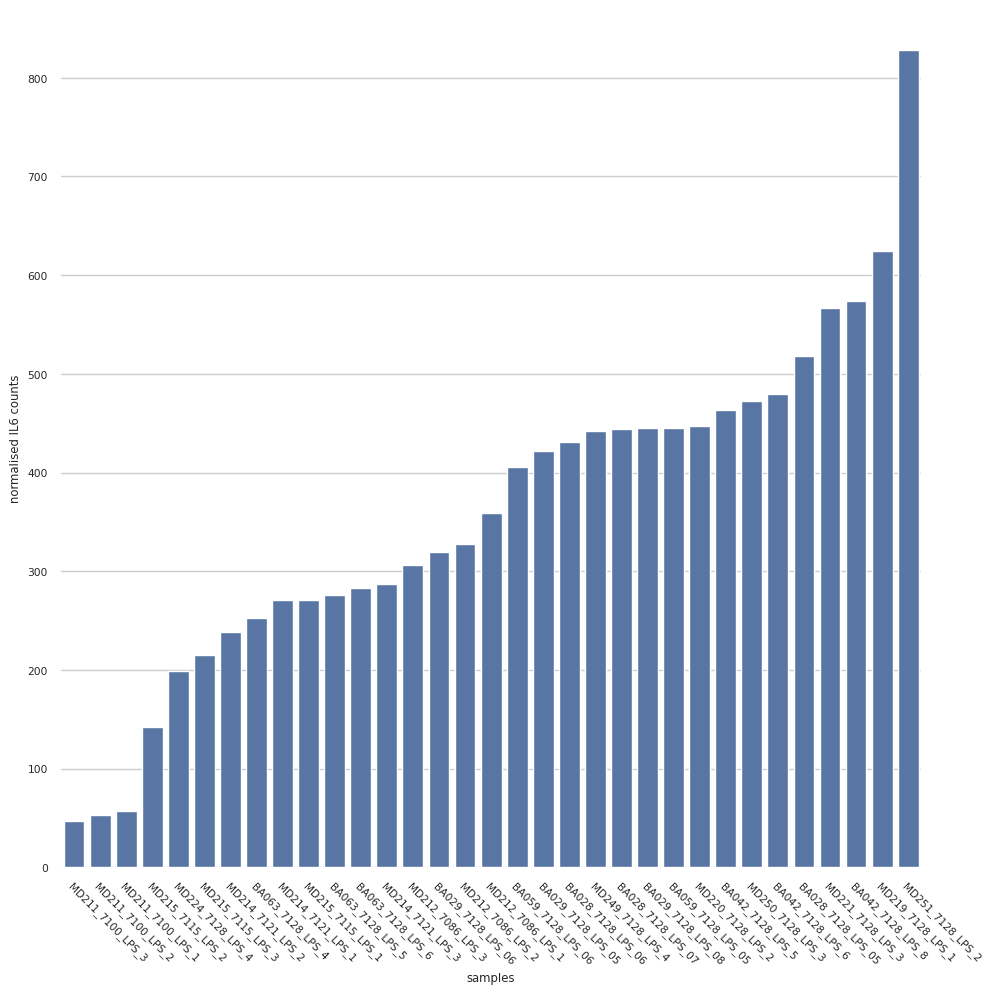

In [ ]:
sns.set_theme(style="whitegrid", font_scale=0.7)


fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x=il6_lps.index, y="IL6", data=il6_lps)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=-45, ha="left", rotation_mode="anchor"
)

ax.set(ylabel="normalised IL6 counts", xlabel="samples")

sns.despine(left=True, bottom=True)

plt.tight_layout()
fig.savefig("IL6_LPS.png")
plt.show()

In [ ]:
il6[["_Pam3_" in s for s in il6.index]]

BA028_7128_Pam3_09    1477.0
BA028_7128_Pam3_10    1438.0
BA028_7128_Pam3_11    1556.0
BA028_7128_Pam3_12     985.0
BA063_7128_Pam3_16    1383.0
BA063_7128_Pam3_17    1298.0
BA063_7128_Pam3_18    1305.0
MD211_7100_Pam3_1      275.0
MD211_7100_Pam3_2      262.0
MD211_7100_Pam3_3      203.0
MD212_7086_Pam3_1      857.0
MD212_7086_Pam3_2     1195.0
MD212_7086_Pam3_3      656.0
MD214_7121_Pam3_1      176.0
MD214_7121_Pam3_2      141.0
MD214_7121_Pam3_3      115.0
MD215_7115_Pam3_1      338.0
MD215_7115_Pam3_2      273.0
MD215_7115_Pam3_3      302.0
MD224_7128_Pam3_1     1003.0
MD224_7128_Pam3_2     1122.0
MD224_7128_Pam3_3     1089.0
MD250_7128_Pam3_5     1121.0
MD250_7128_Pam3_6     1485.0
Name: IL6, dtype: float64

In [ ]:
il6[["_R848_" in s for s in il6.index]]

In [ ]:
il6[["_PGN_" in s for s in il6.index]]

Here are the samples that are droped in based on the analysis

In [96]:
data = data.loc[data.index != "MD215_7115_IMDM_3"]  # Drop for low concentration
data = data.loc[data.index != "BA029_7128_IMDM_03"]
data = data.loc[data.index != "BA028_7128_IMDM_03"]

In [97]:
data.shape

(273, 47698)

In [98]:
training_classes = ["_IMDM_", "_LPS_", "_Fla-PA_", "_R848", "_PGN_", "_Pam3_"]

In [ ]:
training_data = pd.DataFrame()

index_list = []
for my_class in training_classes:
    for index, sample_id in enumerate(data.index):
        if my_class in sample_id:
            print(my_class)
            index_list.append(index)

    # df = pd.concat([df, data[[ my_class in s for s in data.index]]], axis=1)

In [100]:
training_data = data.iloc[index_list]

In [101]:
training_data.shape

(153, 47698)

In [102]:
training_data = training_data[["low" not in s for s in training_data.index]]
training_data = training_data.loc[training_data.index != "MD211_7100_LPS_1"]
training_data = training_data.loc[training_data.index != "MD211_7100_LPS_2"]
training_data = training_data.loc[training_data.index != "MD211_7100_LPS_3"]

In [103]:
training_data.shape

(138, 47698)

In [104]:
training_data.to_csv(
    "/home/t.afanasyeva/MAT_rnaseq/gene_counts/240319_training_data_138_samples.csv"
)

In [105]:
classes = [i.split("_")[2] for i in training_data.index]
batches = [i.split("_")[1] for i in training_data.index]

In [106]:
df_labels = pd.DataFrame()
df_labels.index = training_data.index
df_labels["label"] = classes

In [ ]:
# df_labels= pd.read_csv("/home/t.afanasyeva/MAT_rnaseq/gene_counts/20240311_labels_138_samples.csv")

In [107]:
df_labels.to_csv(
    "/home/t.afanasyeva/MAT_rnaseq/gene_counts/240319_labels_138_samples.csv"
)

In [116]:
# df_labels = df_labels.replace({'848':"R848"})

In [108]:
sns.set_style("white")

<Axes: title={'center': 'Count (target)'}, xlabel='label'>

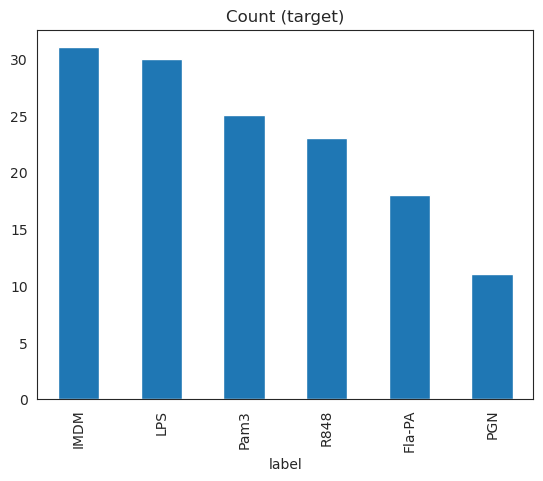

In [109]:
df_labels["label"].value_counts().plot(kind="bar", title="Count (target)")

In [ ]:
# training_data.to_csv("/home/t.afanasyeva/MAT_rnaseq/gene_counts/20240311_training_data_151_samples.csv")